#### Import Modules

* `numpy`: To deal with the number lists in the project
* `pandas`: To analyze and manipulate the data
* `pyplot` from `matplotlib`: To plot the images from the dataset
* `seaborn`: To visualize the data
* `preprocessing` from `sklearn`: To preprocess the data
* `train_test_split` from `sklearn`: To split the dataset into training and testing datasets
* `metrics` from `sklearn`: To calculate the accuracy of the model
* `RandomForestClassifier` from `sklearn`: To create a classifier for the datasets
* `warnings`: To ignore the notebook file’s basic warnings

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

#### After importing all the necessary modules, load the dataset. 

In [11]:
df = pd.read_csv('../dataset/cvd_cleaned.csv', encoding='ISO-8859-1')
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


### Creating the Pair Grid
After loading the dataset, I created the pairing grid of different plots from the df DataFrame. The PairGrid() function is a seaborn method used to generate the pair grid of multiple plots. This method accepts the DataFrame that contains the data to be visualized.

After creating a pair grid, I plot the following:

* histplot: It is an attribute from seaborn to plot the histogram of the dataset.
* scatterplot: It is an attribute from seaborn to plot the scatter plots.

I plot the histogram in the diagonal of the pair plots and the scatter plot in the off-diagonals. 

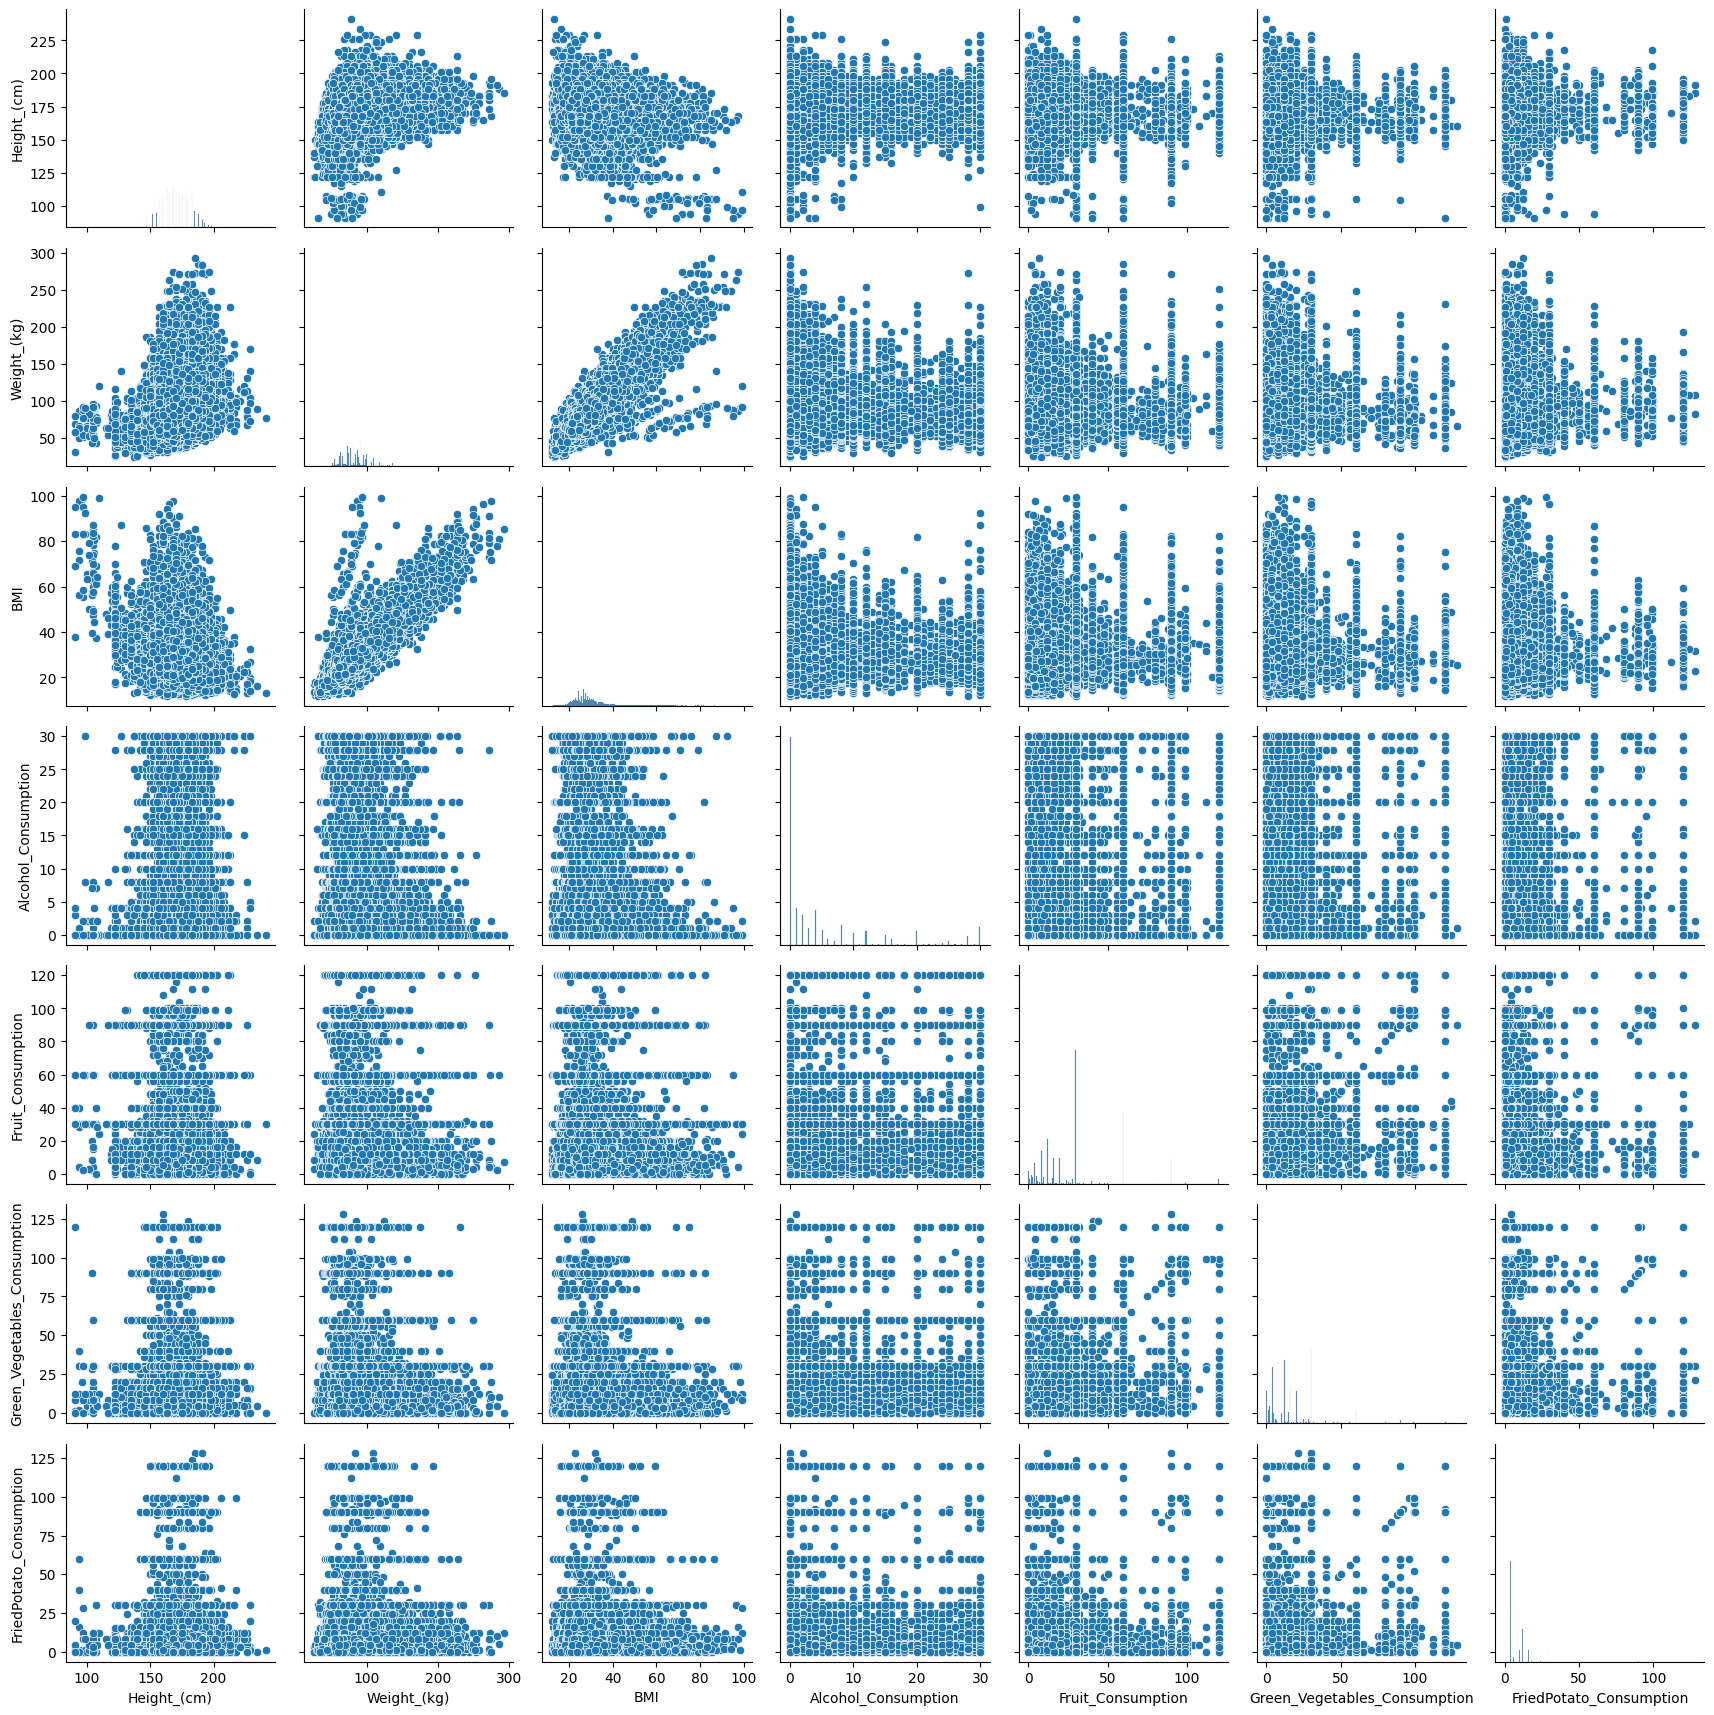

In [12]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

### After creating the pair grids of the dataset, I'm plotting the distribution of the categorical features of the dataset

The following steps were performed:

1. Get all of the categorical features from the dataset.
2. Create a figure using matplotlib.pyplot.
3. Iterated through all the categorical features and created subplots of each column in the figure.

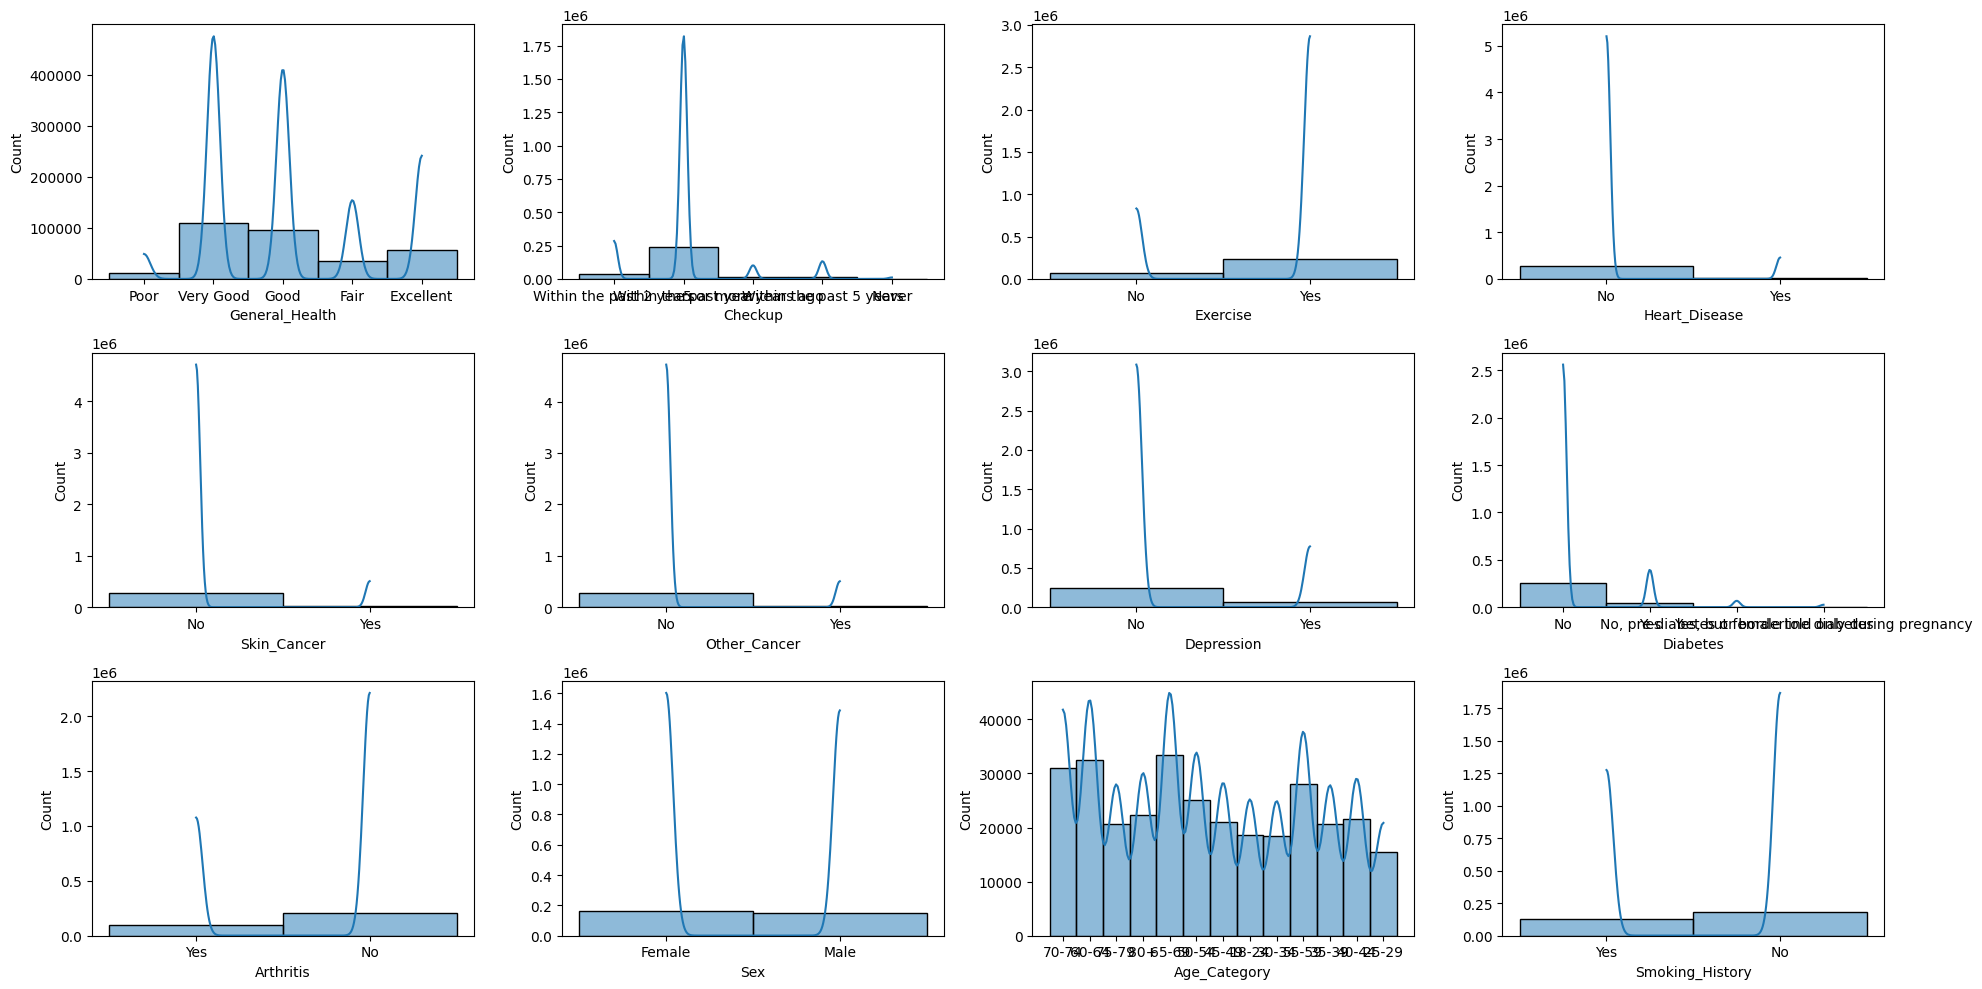

In [13]:
categorical_features = df.columns[df.dtypes =='object']
plot_num = 1
plt.figure(figsize=(20,10))
for col in categorical_features:
    ax = plt.subplot(3,4,plot_num)
    sns.histplot(df[col], kde=True)
    plot_num +=1

plt.tight_layout()

### After plotting the distribution of categorical features, I'm plotting the distribution of the numerical features of the dataset.

The following steps were performed:

* Get all of the numerical features from the dataset.
* Created a figure using matplotlib.pyplot.
* Iterated through all the numerical features and created subplots of each column in the figure.

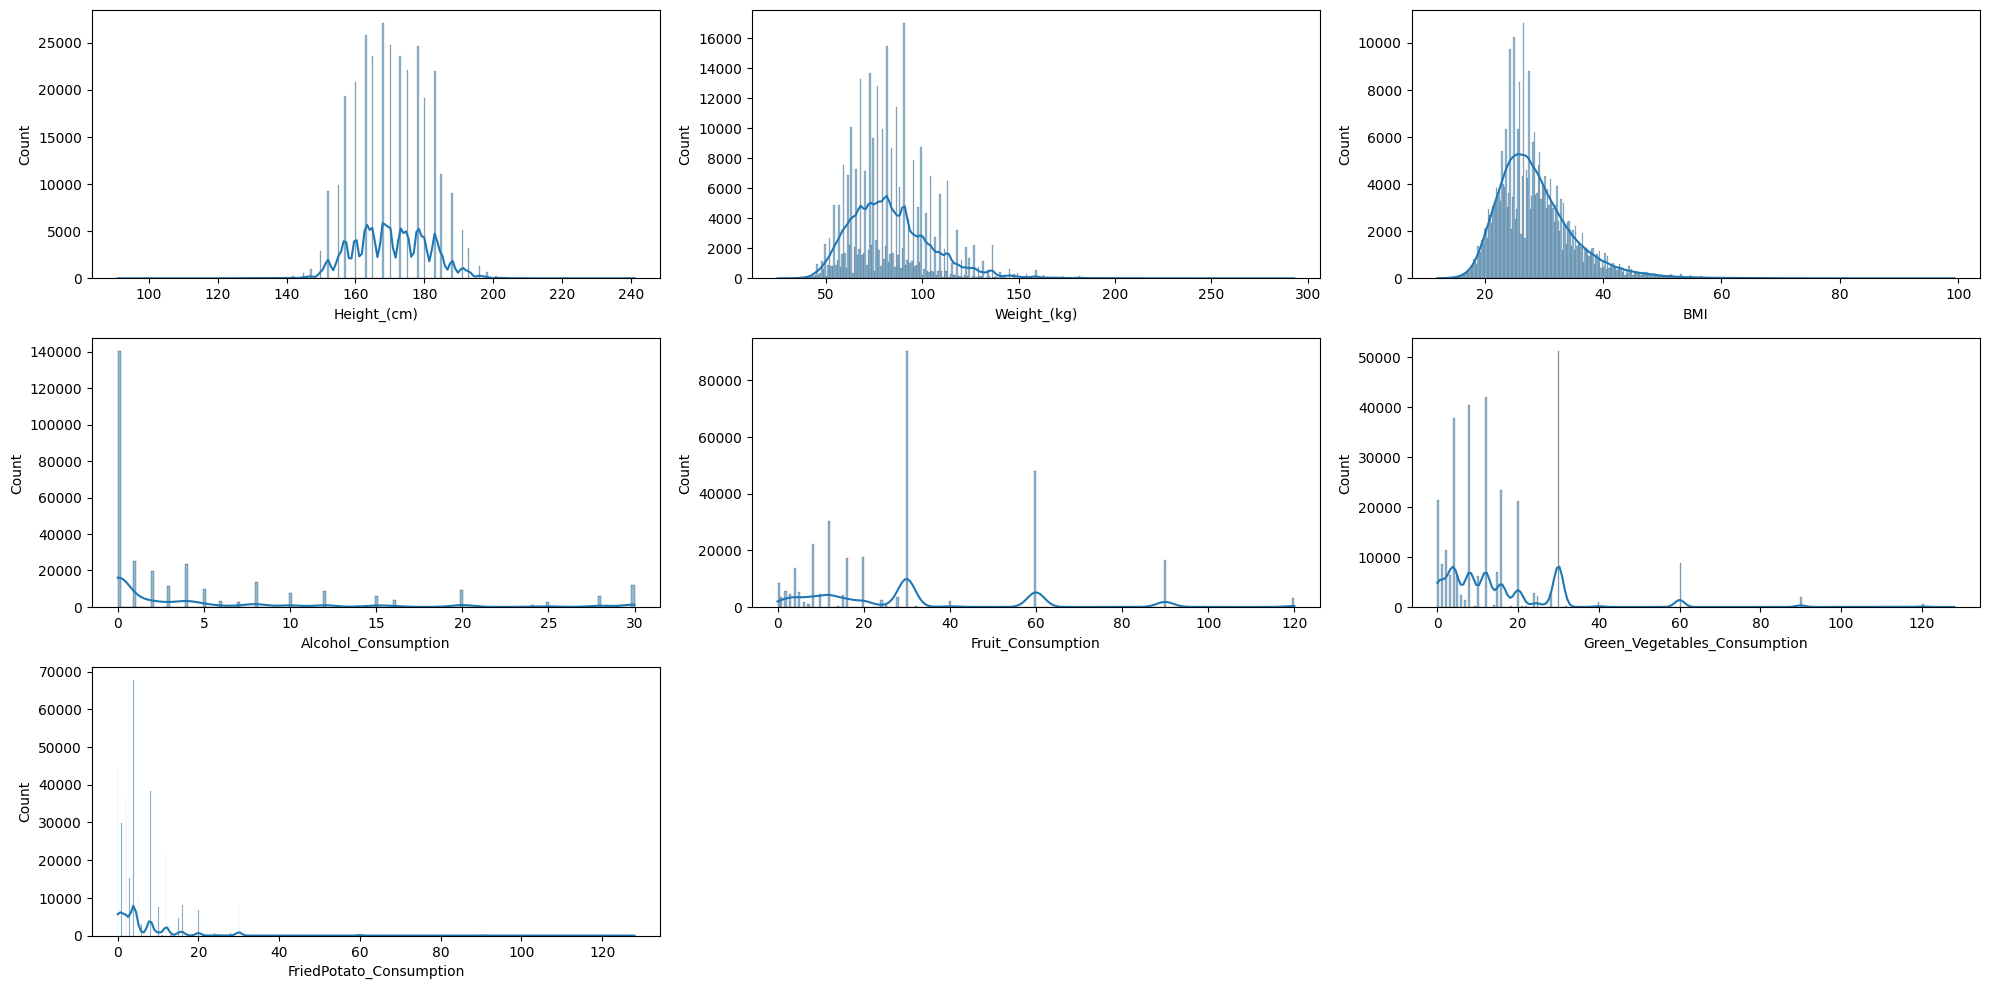

In [14]:
numerical_features = df.columns[df.dtypes !='object']
plot_num = 1
plt.figure(figsize=(20,10))
for col in numerical_features:
    ax = plt.subplot(3,3,plot_num)
    sns.histplot(df[col], kde=True)
    plot_num +=1

plt.tight_layout()

### Plot the relation of different factors with heart disease.

The following steps were performed:

* Select different factors from the dataset.
* Iterated through the factors and plot the counterplot of each factor with the disease.

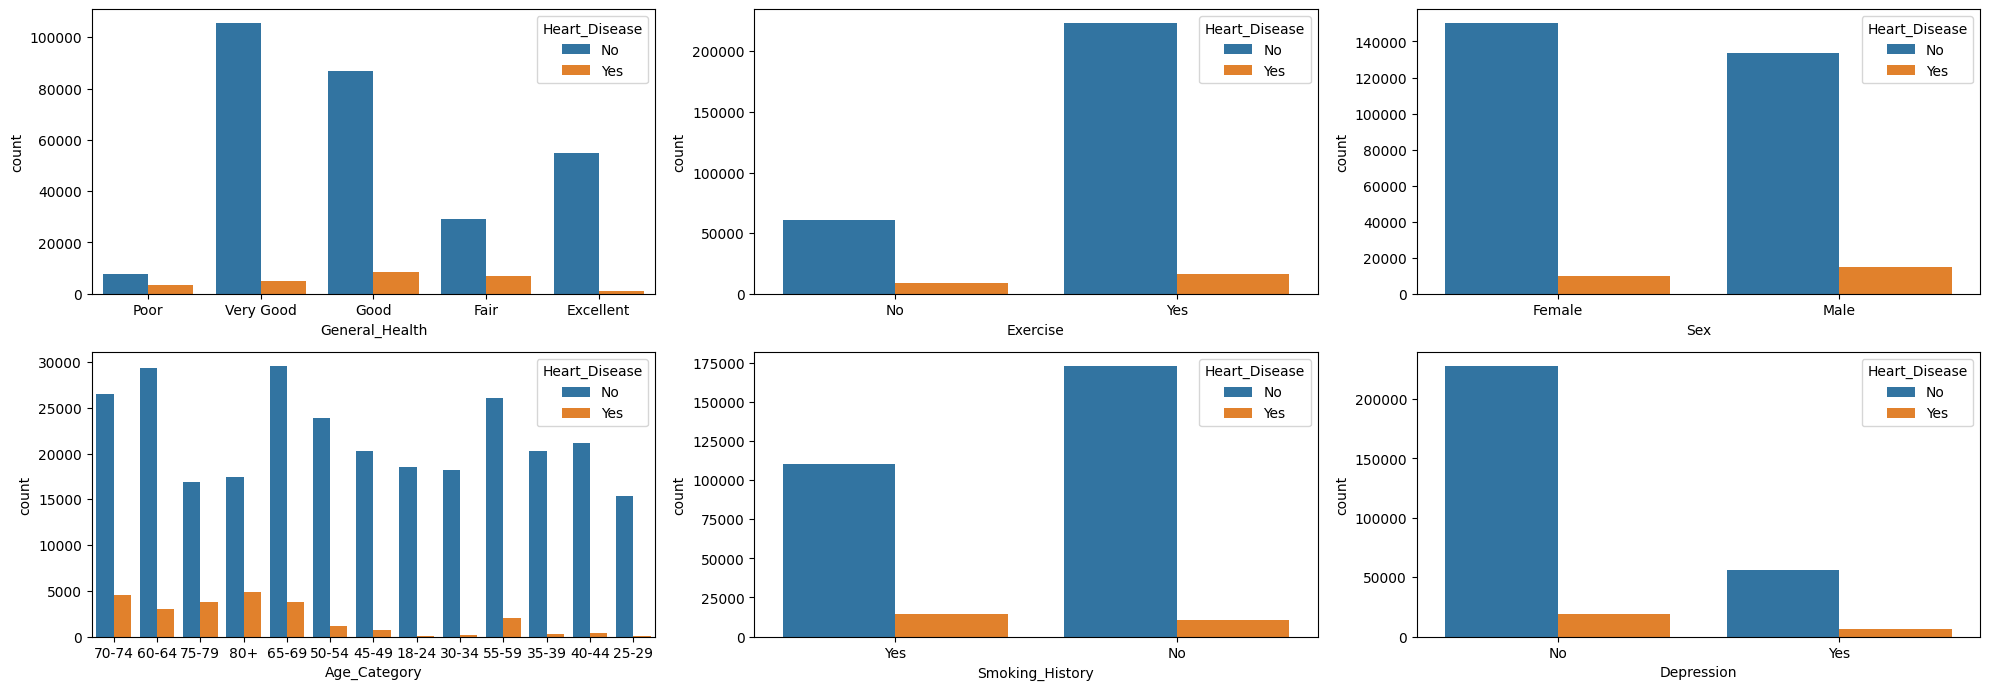

In [15]:
selected_variables = ['General_Health', 'Exercise', 'Sex', 'Age_Category', 'Smoking_History', 'Depression']
disease = 'Heart_Disease'
plot_num = 1
plt.figure(figsize=(20,10))
for variable in selected_variables:
    ax = plt.subplot(3,3, plot_num)
    sns.countplot(data=df, x = variable, hue = disease)
    plot_num += 1
plt.tight_layout()

### After plotting the distributions, the data was preprocessed by transforming the categorical data into numerical data. 
The following steps were performed:

* Created a copy of the dataset so that the actual data isn't lost.
* Got the indexes of the categorical dataset.
* Used the fit_transform() method from the LabelEncoder() class to transform the data.
* Printed the first five rows of the dataset.


In [16]:
data = df.copy()
categorical_features = df.columns[df.dtypes =='object']
le = LabelEncoder()
for i in categorical_features:
    data[i] = le.fit_transform(data[i])
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,3,4,1,1,0,0,0,2,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0
